In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://query.data.world/s/tz5fdncop5de2c66owkyupemkhgf7y')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


- 0 = Not purchased
- 1 = Purchased

The objective of the case study is to use this data to built a ML Model that may help the sales team at this company to filter those customer who are highly likely to take the product and hence they may improve their efficiency


**Without the ML Model**
- 1000 new customer.
- Required to call all 1000 customers
- Out of these 1000 customer, 200 of them purchased the product
- buying rate = 200/1000 = 20%

**With the ML Model**
- 1000 new customer.
- Using the ML Model, they may filter the customer who are highly likely to take the product. Let's say the model filtered 600 customers.
- Now, the sales team would call these 600 customers, let's say 200 of them took the product.
- buying rate = 200/600 = 33.3%


- Reduction in efforts
- Improvement in the buying rate

In [3]:
df.columns = list(map(lambda x:x.lower(), df.columns))

In [4]:
df.head()

,user id,gender,age,estimatedsalary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


- **EDA**

<AxesSubplot:title={'center':'Gender'}, xlabel='gender', ylabel='count'>

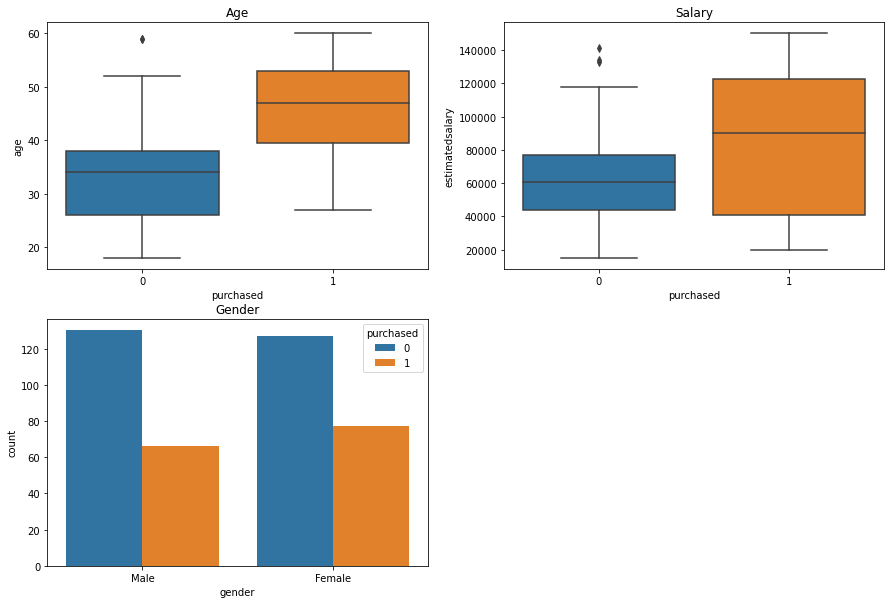

In [5]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.title('Age')
sns.boxplot(x = df['purchased'], y = df['age'])

plt.subplot(2,2,2)
plt.title('Salary')
sns.boxplot(x = df['purchased'], y = df['estimatedsalary'])

plt.subplot(2,2,3)
plt.title('Gender')
sns.countplot(df['gender'], hue = df['purchased'])

**The product is preffered by**
- customer with age bracket 40-55
- salary bracker 40k - 120k
- And there is a equal response among males and females for this prodcut

**Pre-Processing**

In [6]:
df.head()

,user id,gender,age,estimatedsalary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df['gender'].replace({'Male':1, 'Female':0}, inplace = True)

In [8]:
df.head()

,user id,gender,age,estimatedsalary,purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
X = df.drop(columns = ['purchased'])
y = df['purchased']


**Train-Test Split**

In [11]:
df.shape

(400, 5)

In [12]:
df.purchased.value_counts()

0    257
1    143
Name: purchased, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7,
                                                   random_state = 100,
                                                   stratify = y)

In [17]:
y_train.value_counts()

0    180
1    100
Name: purchased, dtype: int64

In [18]:
y_test.value_counts()

0    77
1    43
Name: purchased, dtype: int64

**Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train.drop(columns = 'user id'))
X_train_scale = pd.DataFrame(X_train_scale)
X_train_scale.columns = X_train.columns[1:]
X_train_scale.head()

,gender,age,estimatedsalary
0,1.021663,-1.311279,-1.452024
1,1.021663,0.205120,0.225528
2,-0.978796,-1.690379,0.435222
3,1.021663,0.110345,0.285441
4,-0.978796,-1.311279,0.644916


In [38]:
X_test_scale = scaler.transform(X_test.drop(columns = 'user id'))
X_test_scale = pd.DataFrame(X_test_scale)
X_test_scale.columns = X_test.columns[1:]
X_test_scale.head()

,gender,age,estimatedsalary
0,-0.978796,-0.932179,0.495135
1,-0.978796,-0.079205,0.105703
2,-0.978796,0.773770,-0.792986
3,1.021663,-1.311279,-0.373598
4,-0.978796,-0.458305,2.442293


### Fit Logistic Regression Model

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the perfromace of the model on test data**

In [40]:
y_pred = lr.predict(X_test_scale)

In [41]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall/Sensitivity: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 SCore: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred))

Accuracy:  0.8333333333333334
Recall/Sensitivity:  0.6744186046511628
Precision:  0.8285714285714286
F1 SCore:  0.7435897435897435
ROC AUC:  0.7982482633645424


- FN: In actual the product was purchased but model predicted not purchased.
- FP: In actual the product was not purchased but the model predicted purchased.

In order to reduced FN, we should increase Sensitivity

### Probabiltiy Cutoff

In [44]:
prob = X_train[['user id']]

In [45]:
prob.head()

,user id
66,15679760
266,15721592
136,15668504
348,15579212
145,15746422


In [46]:
prob['acutal'] = y_train

In [47]:
prob.head()

,user id,acutal
66,15679760,0
266,15721592,0
136,15668504,0
348,15579212,0
145,15746422,0


In [50]:
prob['y_pred_prob'] = lr.predict_proba(X_train_scale)[:, 1]

In [51]:
prob.head()

,user id,acutal,y_pred_prob
66,15679760,0,0.005883
266,15721592,0,0.471883
136,15668504,0,0.007050
348,15579212,0,0.431686
145,15746422,0,0.020120


In [54]:
cut = [float(x)/10 for x in range(0,11)]
for i in cut:
    prob[i] = prob.y_pred_prob.map(lambda x:1 if x>i else 0)

In [57]:
cut

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [56]:
prob.head()

,user id,acutal,y_pred_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
66,15679760,0,0.005883,1,0,0,0,0,0,0,0,0,0,0
266,15721592,0,0.471883,1,1,1,1,1,0,0,0,0,0,0
136,15668504,0,0.007050,1,0,0,0,0,0,0,0,0,0,0
348,15579212,0,0.431686,1,1,1,1,1,0,0,0,0,0,0
145,15746422,0,0.020120,1,0,0,0,0,0,0,0,0,0,0


In [58]:
cuttoff_df = pd.DataFrame(columns = ['prob', 'accuracy', 'recall', 'precision'])

for i in cut:
    a = accuracy_score(prob['acutal'], prob[i])
    r = recall_score(prob['acutal'], prob[i])
    p = precision_score(prob['acutal'], prob[i])
    
    cuttoff_df.loc[i] = [i, a, r, p]

In [59]:
cuttoff_df

,prob,accuracy,recall,precision
0.0,0.0,0.357143,1.00,0.357143
0.1,0.1,0.700000,0.99,0.543956
0.2,0.2,0.764286,0.97,0.606250
0.3,0.3,0.821429,0.92,0.686567
0.4,0.4,0.842857,0.83,0.754545
0.5,0.5,0.846429,0.72,0.827586
0.6,0.6,0.817857,0.60,0.845070
0.7,0.7,0.807143,0.52,0.896552
0.8,0.8,0.782143,0.44,0.897959
0.9,0.9,0.732143,0.29,0.878788


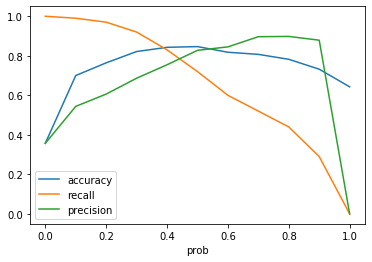

In [60]:
cuttoff_df.plot.line(x = 'prob', y = ['accuracy', 'recall', 'precision'])

optimal cuttoff = 0.4

Let's use this cuttoff to check the model perfromace on the test data

In [66]:
y_test_proba = lr.predict_proba(X_test_scale)[:,1]

In [68]:
y_test_04 = list(map(lambda x: 1 if x>0.4 else 0, y_test_proba))

In [69]:
print("Accuracy: ", accuracy_score(y_test, y_test_04))
print("Recall/Sensitivity: ", recall_score(y_test,y_test_04))
print("Precision: ", precision_score(y_test, y_test_04))
print("F1 SCore: ", f1_score(y_test, y_test_04))
print("ROC AUC: ", roc_auc_score(y_test, y_test_04))

Accuracy:  0.875
Recall/Sensitivity:  0.813953488372093
Precision:  0.8333333333333334
F1 SCore:  0.8235294117647058
ROC AUC:  0.861522198731501


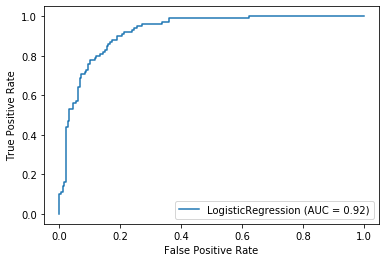

In [70]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_train_scale, y_train)

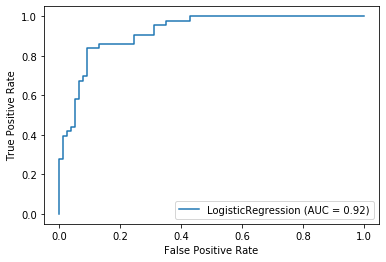

In [71]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr, X_test_scale, y_test)